<a href="https://colab.research.google.com/github/Vangolds/DPDM/blob/master/Kmean_Clustering_ipynbfrom_sklearn_datasets_import_make_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs

In [5]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [6]:
X.shape

(300, 2)

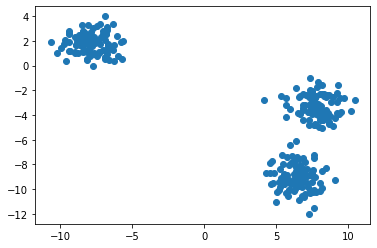

In [7]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

#import

In [8]:
from sklearn.cluster import KMeans

In [9]:
KMclust = KMeans(n_clusters=5)

In [10]:
KMclust.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Predict

In [11]:
label = KMclust.predict(x)

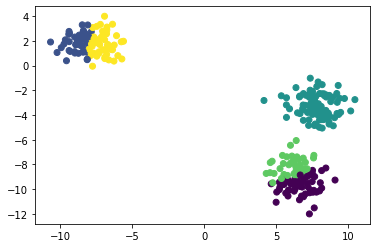

In [12]:
plt.scatter(X[:,0],X[:,1], c=label)

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/My Drive/DWDM_material'
os.listdir(path)

Mounted at /content/drive


['teach.csv',
 'test.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'metadata.xlsx',
 'Preprocessing02.html',
 'Copy of w_restaurant.csv',
 'teach02.csv',
 'search_click.csv.crdownload',
 'Copy of search_click.csv.crdownload',
 'search_click.csv',
 'w_restaurant.csv',
 'reduced_marketbasket.csv',
 'mandrill.JPG']

In [18]:
import cv2
import os

In [24]:
img = cv2.imread(os.path.join(path,'mandrill.JPG'))

In [26]:
img.shape

(1362, 2048, 3)

In [25]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

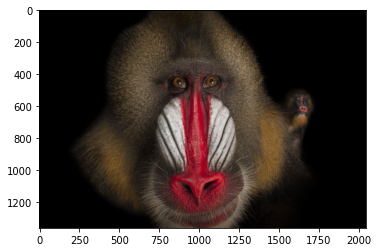

In [27]:

RGB_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(RGB_img)

#count unique colors

In [29]:
import numpy as np

In [30]:
np.unique(RGB_img).shape

(256,)

#Use K-mean to reduce colors

In [31]:
#define
myQuqntize = KMeans(n_clusters=10)

In [34]:
img_row = np.reshape(RGB_img,(1362*2048, 3))
img_row

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [35]:
#train
myQuqntize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
#Predict
res = myQuqntize.predict(img_row)

In [39]:
res

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [36]:
Clus_cen = myQuqntize.cluster_centers_
Clus_cen

array([[ 28.93808631,  22.58327325,  16.95139051],
       [198.69141992, 192.06328635, 187.83208779],
       [ 74.46421169,  57.5813445 ,  43.63017502],
       [  0.85563325,   0.6515703 ,   0.47986352],
       [173.28283143,  58.55112178,  68.55356929],
       [ 52.44260709,  39.40285958,  29.94863195],
       [121.53257716, 101.51450498,  80.31478327],
       [132.35420697,  19.68699163,  35.90729416],
       [157.71252473, 140.52354571, 130.97220024],
       [ 98.15348147,  77.39942594,  57.32705065]])

In [40]:
Clus_cen.shape

(10, 3)

#Mab color back to the image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuqntize.predict([RGB_img[i,j,:]]),:]

In [ ]:
new_img_ new_img/255

In [ ]:
plt.imshow(new_img_)